<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Decision Tree</a></span><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#No-max_depth" data-toc-modified-id="No-max_depth-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>No max_depth</a></span></li><li><span><a href="#max_depth-=-2" data-toc-modified-id="max_depth-=-2-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>max_depth = 2</a></span></li><li><span><a href="#Best-max_depth" data-toc-modified-id="Best-max_depth-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Best max_depth</a></span></li></ul></li></ul></div>

# Decision Tree

In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_score
from sklearn.preprocessing import normalize
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
url = "https://raw.githubusercontent.com/fardinabbasi/Decision_Tree/main/Diabetes.csv"
df = pd.read_csv(url)
print(df.head())

   pregnant  glucose  BP  skin  insulin   BMI  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1


## Preprocessing

In [3]:
X = df.drop('label', axis = 1, inplace = False)
Y = df['label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

## No max_depth

In [4]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [5]:
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

print("Percision for test data = "+str(round(precision_score(Y_test,y_pred_test)*100,3))+"%")
print("Percision for train data = "+str(precision_score(Y_train,y_pred_train)*100)+"%")

Percision for test data = 57.895%
Percision for train data = 100.0%


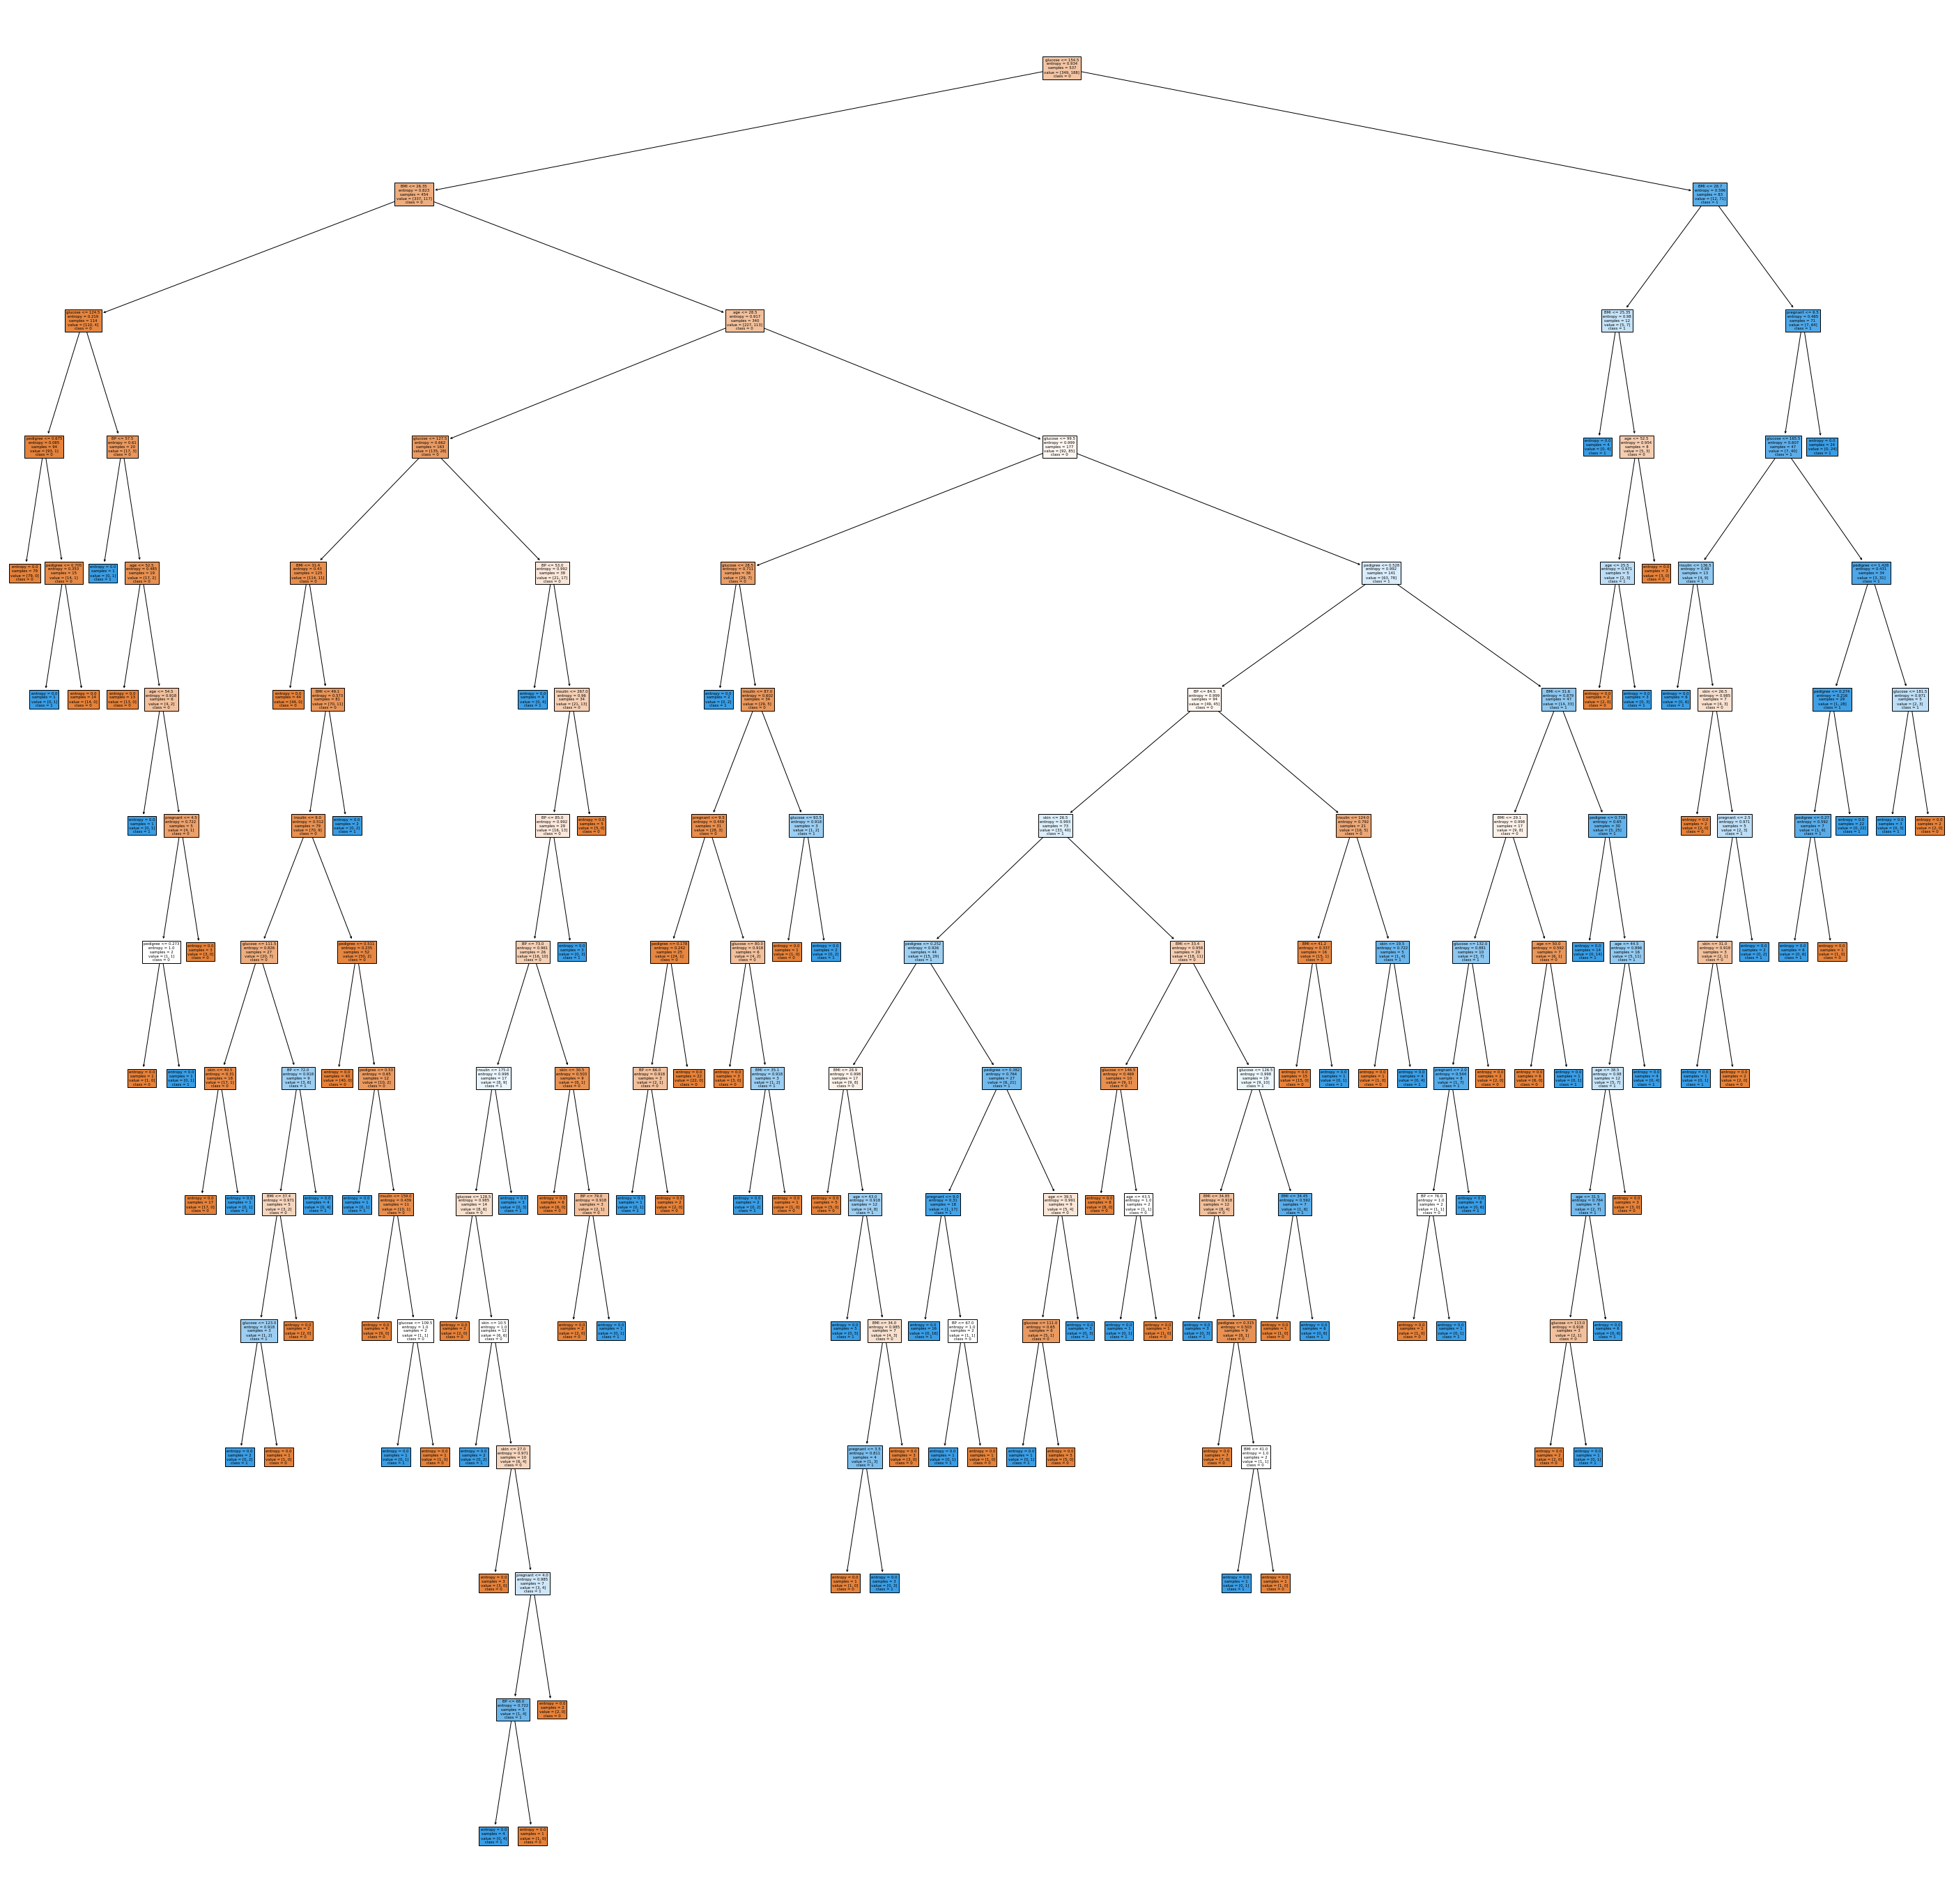

In [6]:
fig = plt.figure(figsize=(50,50))
_ = plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names=['0','1'],
                   filled=True)

## max_depth = 2

In [7]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=2)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [8]:
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

print("Percision for test data = "+str(round(precision_score(Y_test,y_pred_test)*100,3))+"%")
print("Percision for train data = "+str(round(precision_score(Y_train,y_pred_train)*100,3))+"%")

Percision for test data = 69.231%
Percision for train data = 85.542%


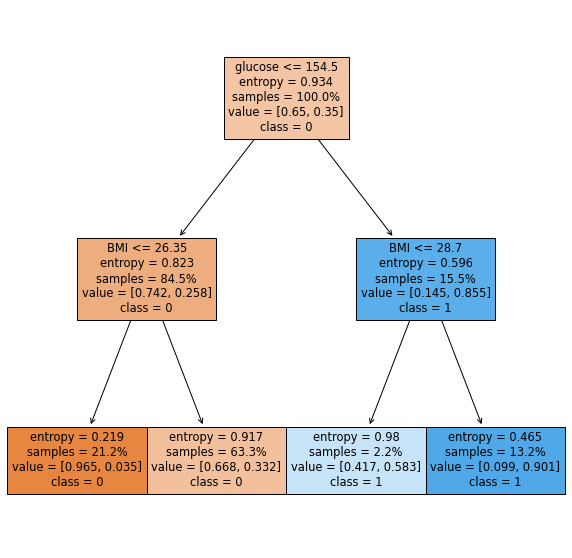

In [9]:
fig = plt.figure(figsize=(10,10))
_ = plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names=['0','1'],proportion=True,
                   filled=True)

## Best max_depth 

In [11]:
from sklearn.model_selection import RandomizedSearchCV

In [12]:
param_dist = {'max_depth': np.arange(1,15,1)}
clf = DecisionTreeClassifier(criterion='entropy')
rand_search = RandomizedSearchCV(clf, param_distributions = param_dist, n_iter=5, cv=5)
rand_search.fit(X_train, Y_train)
# Create a variable for the best model
best_clf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best Hyperparameters:',  rand_search.best_params_)

Best Hyperparameters: {'max_depth': 3}


              precision    recall  f1-score   support

           0       0.72      0.93      0.81       151
           1       0.71      0.31      0.43        80

    accuracy                           0.72       231
   macro avg       0.72      0.62      0.62       231
weighted avg       0.72      0.72      0.68       231



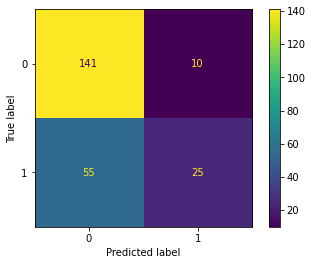

In [24]:
y_pred_test = best_clf.predict(X_test)
y_pred_train = best_clf.predict(X_train)

print(classification_report(Y_test, y_pred_test))
ConfusionMatrixDisplay(confusion_matrix(Y_test,y_pred_test)).plot();

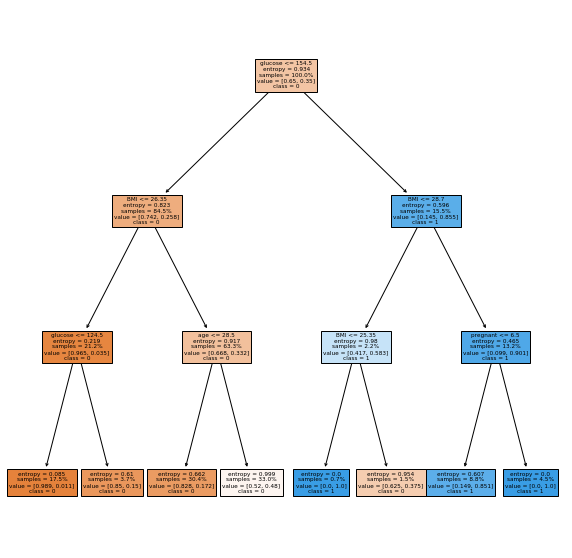

In [26]:
fig = plt.figure(figsize=(10,10))
_ = plot_tree(best_clf, 
                   feature_names=X.columns,  
                   class_names=['0','1'],proportion=True,
                   filled=True)